# Lecture 16 - Heat Effects in Batch Microbial Cultures

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [4]:
H_rxn = -1/0.42*4.184 #kJ/g (Shuler, p. 190). Note that Delta H = 1/YH. Yh = 0.42 for gluocse, 0.061 for methane!
print(f'H_rxn = {H_rxn:.3f} kJ/g cells')

H_rxn = -9.962 kJ/g cells


In [6]:
#Load parameters
umax = 1.42 #1/hr
Ks = 0.05 #g/L
Ys = 0.5 #g cell/g sugar
S0 = 30 #g/L
X0 = 0.1 #g/L
T0 = 37 #celsius
rho = 1. #kg/L
Cp = 4.184 #kJ/kg-K
V = 50 #L reactor

## First pass -- assume no impact of temperature on growth kinetics

In [7]:
def deriv(Y, t):
    X,S,T = Y
    r = umax*S/(Ks+S)*X
    dXdt = r
    dSdt = -r/Ys
    dTdt = r*-H_rxn/(rho*Cp)
    return dXdt, dSdt, dTdt

In [8]:
t_span = np.linspace(0, 10, 100)
sol = np.asarray(odeint(deriv, [X0, S0, T0], t_span))

Text(0, 0.5, 'Reactor Temperature (C)')

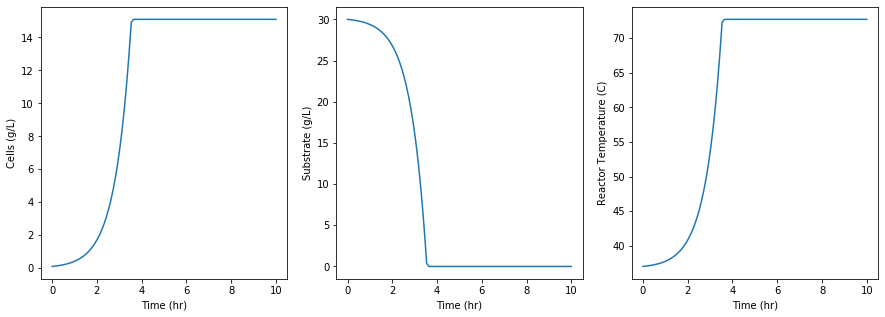

In [9]:
fig, ax = plt.subplots(1,3, figsize = [15,5])

ax[0].plot(t_span, sol[:,0])
ax[0].set_xlabel('Time (hr)')
ax[0].set_ylabel('Cells (g/L)')
ax[1].plot(t_span, sol[:,1])
ax[1].set_xlabel('Time (hr)')
ax[1].set_ylabel('Substrate (g/L)')
ax[2].plot(t_span, sol[:,2])
ax[2].set_xlabel('Time (hr)')
ax[2].set_ylabel('Reactor Temperature (C)')

In [ ]:
#Plot conversion vs T
conversion = (S0-sol[:,1])/S0
plt.plot(conversion, sol[:,2])
plt.xlabel('Conversion')
plt.ylabel('Temperature (C)')

## Schoolfield Model for Temperature Dependence of Growth Rate
APPLIED AND ENVIRONMENTAL MICROBIOLOGY, Apr. 1991, p. 1094-1101
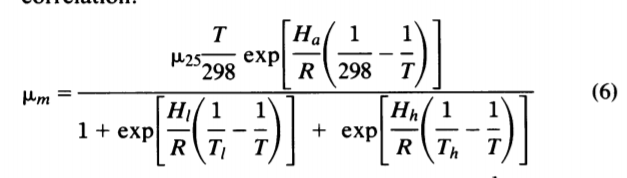

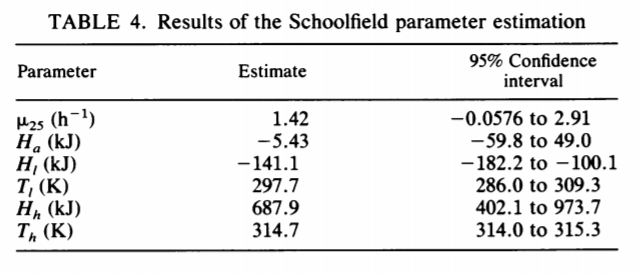

In [10]:
def schoolfield(TC):
    T = TC+273.15
    u25 = 1.42 #1/hr
    Ha = -5.43 #kJ/mol
    Hl = -141.1 #kJ/mol
    Tl = 297.7 #K
    Hh = 687.9 #kJ/mol
    Th = 314.7 #K
    R = 8.314/1000 #kJ/mol-K
    umax = u25*(T/298)*np.exp(Ha/R*(1/298-1/T)) / (1+ np.exp(Hl/R*(1/Tl-1/T)) + np.exp(Hh/R*(1/Th-1/T)))
    return umax

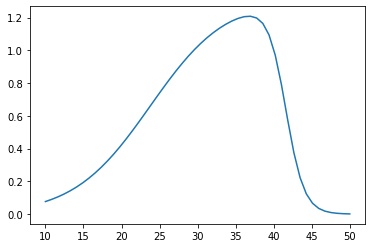

In [11]:
T_span = np.linspace(10, 50, 50)
umax = schoolfield(T_span)
plt.plot(T_span, umax)

In [12]:
#Re-do with temperature dependence of growth rate
def deriv_T(Y, t):
    X,S,T = Y
    umax = schoolfield(T)
    r = umax*S/(Ks+S)*X
    dXdt = r
    dSdt = -r/Ys
    dTdt = r*-H_rxn/(rho*Cp)
    return dXdt, dSdt, dTdt

In [13]:
sol_T = np.asarray(odeint(deriv_T, [X0, S0, T0], t_span))

Text(0, 0.5, 'Reactor Temperature (C)')

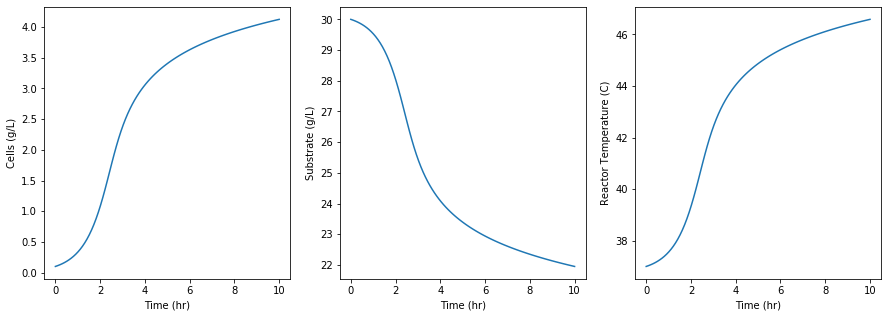

In [14]:
fig, ax = plt.subplots(1,3, figsize = [15,5])

ax[0].plot(t_span, sol_T[:,0])
ax[0].set_xlabel('Time (hr)')
ax[0].set_ylabel('Cells (g/L)')
ax[1].plot(t_span, sol_T[:,1])
ax[1].set_xlabel('Time (hr)')
ax[1].set_ylabel('Substrate (g/L)')
ax[2].plot(t_span, sol_T[:,2])
ax[2].set_xlabel('Time (hr)')
ax[2].set_ylabel('Reactor Temperature (C)')

In [ ]:
#Is conversion vs. T still linear
conversion = (S0-sol_T[:,1])/S0
plt.plot(conversion, sol_T[:,2])
plt.xlabel('Conversion')
plt.ylabel('Temperature (C)')
print('You bet!')

## Adding some cooling to get sustained growth

In [26]:
mc = 0.5 #kg/min

In [27]:
def heat_removed(T):
    TK = T+273.15
    Ta1 = 25+273.15 #K
    Ua = 41.8 #kJ/K-s
    Q = -mc*Cp*(TK-Ta1)*(1-np.exp(-Ua/(Cp*(mc/60))))*60 #originally in K/s
    return Q

In [28]:
#Re-do with temperature dependence of growth rate
def deriv_TQ(Y, t):
    X,S,T = Y
    umax = schoolfield(T)
    Q = heat_removed(T)
    r = umax*S/(Ks+S)*X
    dXdt = r
    dSdt = -r/Ys
    dTdt = (Q+r*-H_rxn*V)/(rho*V*Cp)
    return dXdt, dSdt, dTdt

In [29]:
sol_TQ = np.asarray(odeint(deriv_TQ, [X0, S0, T0], t_span))

Text(0, 0.5, 'Reactor Temperature (C)')

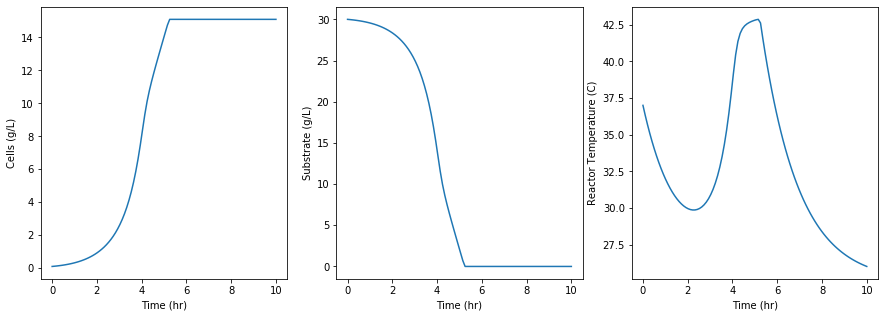

In [30]:
fig, ax = plt.subplots(1,3, figsize = [15,5])

ax[0].plot(t_span, sol_TQ[:,0])
ax[0].set_xlabel('Time (hr)')
ax[0].set_ylabel('Cells (g/L)')
ax[1].plot(t_span, sol_TQ[:,1])
ax[1].set_xlabel('Time (hr)')
ax[1].set_ylabel('Substrate (g/L)')
ax[2].plot(t_span, sol_TQ[:,2])
ax[2].set_xlabel('Time (hr)')
ax[2].set_ylabel('Reactor Temperature (C)')